In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [2]:
cols = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]
df = pd.read_csv("magic04.data", names=cols)
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [3]:
bool_mask = df['class'] == 'g'
print(type(bool_mask))
bool_mask

<class 'pandas.core.series.Series'>


0         True
1         True
2         True
3         True
4         True
         ...  
19015    False
19016    False
19017    False
19018    False
19019    False
Name: class, Length: 19020, dtype: bool

In [4]:
print(type(bool_mask.shape))
bool_mask.shape

<class 'tuple'>


(19020,)

In [5]:
print(type(bool_mask.index))
bool_mask.index

<class 'pandas.core.indexes.range.RangeIndex'>


RangeIndex(start=0, stop=19020, step=1)

In [6]:
int_bool_mask = bool_mask.astype(int)
int_bool_mask

0        1
1        1
2        1
3        1
4        1
        ..
19015    0
19016    0
19017    0
19018    0
19019    0
Name: class, Length: 19020, dtype: int32

In [7]:
bool_mask

0         True
1         True
2         True
3         True
4         True
         ...  
19015    False
19016    False
19017    False
19018    False
19019    False
Name: class, Length: 19020, dtype: bool

In [8]:
# df['class'] = 'z'
# df.head()

In [9]:
df['class'].unique()

array(['g', 'h'], dtype=object)

In [10]:
type(df['class'].unique())

numpy.ndarray

In [11]:
# df['class'] = int_bool_mask
# df.head()

In [12]:
df['class'] = (df['class'] == 'g').astype(int)
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


# ❤️ Hist

In [13]:
print(type(df[df["class"]==1]))
df[df["class"]==1]

<class 'pandas.core.frame.DataFrame'>


,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1
...,...,...,...,...,...,...,...,...,...,...,...
12327,12.8703,11.4444,2.3811,0.7360,0.3805,-15.0946,5.3032,11.6208,21.0120,204.0370,1
12328,26.8595,20.5946,2.8754,0.3438,0.2152,-3.4556,-20.0014,-9.0535,3.9848,205.4980,1
12329,22.0913,10.8949,2.2945,0.5381,0.2919,15.2776,18.2296,7.3975,21.0680,123.2810,1
12330,56.2216,18.7019,2.9297,0.2516,0.1393,96.5758,-41.2969,11.3764,5.9110,197.2090,1


In [14]:
print(type(df[df["class"]==1]['fLength']))
df[df["class"]==1]['fLength']

<class 'pandas.core.series.Series'>


0         28.7967
1         31.6036
2        162.0520
3         23.8172
4         75.1362
           ...   
12327     12.8703
12328     26.8595
12329     22.0913
12330     56.2216
12331     31.5125
Name: fLength, Length: 12332, dtype: float64

In [15]:
print(type(df[df["class"]==0]['fLength']))
df[df["class"]==0]['fLength']

<class 'pandas.core.series.Series'>


12332     93.7035
12333    102.0005
12334    100.2775
12335     91.6558
12336     38.0195
           ...   
19015     21.3846
19016     28.9452
19017     75.4455
19018    120.5135
19019    187.1814
Name: fLength, Length: 6688, dtype: float64

In [16]:
df[df["class"]==0]['fLength'].describe()

count    6688.000000
mean       70.943504
std        57.952729
min         4.283500
25%        26.145400
50%        47.905400
75%       104.026925
max       334.177000
Name: fLength, dtype: float64

In [17]:
# plt.hist(df[df["class"]==1]['fLength'], color='blue', label='gamma', alpha=0.7, density=True)
# plt.hist(df[df["class"]==0]['fLength'], color='red', label='gamma', alpha=0.7, density=True)
# plt.ylabel("Probability")

# # # plt.hist(df[df["class"]==0]['fLength'], color='red', label='gamma', alpha=0.7, bins=4)
# # # plt.hist(df[df["class"]==0]['fLength'], color='red', label='gamma', alpha=0.7)
# # # plt.ylabel("Frequency")

# plt.xlabel('fLength')
# plt.title('fLength')
# plt.legend()
# plt.show()

In [18]:
# for label in cols[:-1]:
#   plt.hist(df[df["class"]==1][label], color='blue', label='gamma', alpha=0.7, density=True)
#   plt.hist(df[df["class"]==0][label], color='red', label='hadron', alpha=0.7, density=True)
#   plt.title(label)
#   plt.ylabel("Probability")
#   plt.xlabel(label)
#   plt.legend()
#   plt.show()

# Train, validation, test datasets

In [19]:
df_sample = df.sample(frac=1)
df_sample

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
4991,58.1344,23.1666,3.3556,0.2513,0.1351,36.3407,62.9897,-14.2864,4.9350,252.6490,1
2558,73.9749,21.0084,3.0048,0.2779,0.1538,-116.7560,43.8813,18.8414,2.0060,303.8740,1
2480,30.2588,13.9882,2.6010,0.3559,0.1892,21.9051,21.0869,9.6346,8.9360,126.8120,1
4677,20.2473,12.0667,2.5472,0.5475,0.2738,2.9324,-14.1631,7.6082,27.1110,216.8010,1
1144,28.3543,25.5873,2.7668,0.3234,0.1754,29.3307,17.5713,18.6666,33.5090,170.3490,1
...,...,...,...,...,...,...,...,...,...,...,...
7332,22.4510,5.9922,2.2636,0.7956,0.5095,-20.2780,-16.9492,-6.6888,11.5290,111.2050,1
9207,33.9295,12.1658,2.5296,0.3929,0.2378,44.5229,20.1583,-8.8548,11.4480,73.3097,1
10312,24.9084,16.2600,2.7443,0.3820,0.2225,18.3663,4.8267,8.9724,0.7580,148.2650,1
3647,22.6135,10.6883,2.1931,0.5385,0.2981,23.2508,18.9791,-10.3254,10.7152,174.5830,1


In [20]:
df_sample_numpy = df_sample.to_numpy()
df_sample_numpy

array([[ 58.1344,  23.1666,   3.3556, ...,   4.935 , 252.649 ,   1.    ],
       [ 73.9749,  21.0084,   3.0048, ...,   2.006 , 303.874 ,   1.    ],
       [ 30.2588,  13.9882,   2.601 , ...,   8.936 , 126.812 ,   1.    ],
       ...,
       [ 24.9084,  16.26  ,   2.7443, ...,   0.758 , 148.265 ,   1.    ],
       [ 22.6135,  10.6883,   2.1931, ...,  10.7152, 174.583 ,   1.    ],
       [ 27.506 ,  17.6938,   2.7263, ...,   3.3162, 187.61  ,   1.    ]])

In [21]:
df_sample_numpy[0]

array([ 5.81344e+01,  2.31666e+01,  3.35560e+00,  2.51300e-01,
        1.35100e-01,  3.63407e+01,  6.29897e+01, -1.42864e+01,
        4.93500e+00,  2.52649e+02,  1.00000e+00])

In [22]:
df_sample_numpy.shape

(19020, 11)

In [23]:
df_sample_numpy[0] == 0

array([False, False, False, False, False, False, False, False, False,
       False, False])

In [24]:
df_sample_numpy[2] == 0

array([False, False, False, False, False, False, False, False, False,
       False, False])

In [25]:
len(df)

19020

In [26]:
0.6*len(df)

11412.0

In [27]:
[int(0.6*len(df)), int(0.8*len(df))]

[11412, 15216]

# ❤️train, valid, test

This line of code splits a DataFrame into three subsets: training, validation, and test sets. The df.sample(frac=1) method is used to shuffle the rows of the DataFrame randomly, and the np.split() method is used to split the shuffled DataFrame into the three subsets.

In [28]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

In [29]:
train

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
18580,25.8512,11.0935,2.5478,0.4674,0.2705,32.4601,16.6389,4.6739,81.6762,216.1600,0
15355,276.2766,35.8288,3.5838,0.0604,0.0572,-457.9161,-169.1552,15.1931,68.1382,187.0187,0
2464,45.3746,23.9865,3.1012,0.2131,0.1248,18.9356,29.9800,-15.0227,1.1294,126.6710,1
6623,23.9993,10.9858,2.4141,0.5125,0.3064,12.0505,20.2358,5.8304,50.4126,200.2840,1
5558,18.1377,10.5243,2.2041,0.5875,0.3219,22.4127,10.4913,4.1503,63.1860,167.9280,1
...,...,...,...,...,...,...,...,...,...,...,...
1948,51.8528,27.1569,3.1116,0.2776,0.1396,-63.5061,37.7307,-11.6498,0.7280,298.1680,1
14209,14.6656,7.9126,2.4422,0.7620,0.4984,-4.4123,-16.0882,-6.0178,34.0426,206.1159,0
11837,35.3426,12.7244,2.5447,0.3652,0.1840,29.7077,-15.8117,5.1165,18.8214,215.5450,1
16414,18.9805,14.7280,2.4997,0.5222,0.3465,-0.2513,10.4799,9.5463,72.4482,146.7740,0


In [30]:
train['fLength']

18580     25.8512
15355    276.2766
2464      45.3746
6623      23.9993
5558      18.1377
           ...   
1948      51.8528
14209     14.6656
11837     35.3426
16414     18.9805
15333     12.2144
Name: fLength, Length: 11412, dtype: float64

In [31]:
# train['fLength'][10785]

# train['fLength'].loc[10785]

# train.loc[10785, 'fLength']

In [32]:
train['fLength'].iloc[0]

25.8512

In [33]:
train.loc[train.index[0], 'fLength']

25.8512

In [34]:
train.loc[train.index[0:2], 'fLength']

18580     25.8512
15355    276.2766
Name: fLength, dtype: float64

In [35]:
train.iloc[0]['fLength']

25.8512

In [36]:
train.iloc[0:2]['fLength']

18580     25.8512
15355    276.2766
Name: fLength, dtype: float64

In [37]:
train.iloc[0, 0]

25.8512

In [38]:
train.iloc[0:2, 0]

18580     25.8512
15355    276.2766
Name: fLength, dtype: float64

In [39]:
train.iloc[0:2, 0:2]

,fLength,fWidth
18580,25.8512,11.0935
15355,276.2766,35.8288


In [40]:
print(type(train.index))
train.index

<class 'pandas.core.indexes.numeric.Int64Index'>


Int64Index([18580, 15355,  2464,  6623,  5558,  9952,  3880, 16036,  7222,
             3393,
            ...
            18204,  8617,  9286,  6350,   940,  1948, 14209, 11837, 16414,
            15333],
           dtype='int64', length=11412)

# ❤️ StandardScaler, RandomOverSampler

In [41]:
train

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
18580,25.8512,11.0935,2.5478,0.4674,0.2705,32.4601,16.6389,4.6739,81.6762,216.1600,0
15355,276.2766,35.8288,3.5838,0.0604,0.0572,-457.9161,-169.1552,15.1931,68.1382,187.0187,0
2464,45.3746,23.9865,3.1012,0.2131,0.1248,18.9356,29.9800,-15.0227,1.1294,126.6710,1
6623,23.9993,10.9858,2.4141,0.5125,0.3064,12.0505,20.2358,5.8304,50.4126,200.2840,1
5558,18.1377,10.5243,2.2041,0.5875,0.3219,22.4127,10.4913,4.1503,63.1860,167.9280,1
...,...,...,...,...,...,...,...,...,...,...,...
1948,51.8528,27.1569,3.1116,0.2776,0.1396,-63.5061,37.7307,-11.6498,0.7280,298.1680,1
14209,14.6656,7.9126,2.4422,0.7620,0.4984,-4.4123,-16.0882,-6.0178,34.0426,206.1159,0
11837,35.3426,12.7244,2.5447,0.3652,0.1840,29.7077,-15.8117,5.1165,18.8214,215.5450,1
16414,18.9805,14.7280,2.4997,0.5222,0.3465,-0.2513,10.4799,9.5463,72.4482,146.7740,0


In [42]:
valid

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
14987,22.8611,8.2654,2.1624,0.6170,0.3078,32.8702,28.8722,-9.4643,16.1564,131.2128,0
5483,35.6953,28.3828,3.5252,0.2396,0.1290,-13.4253,-22.8975,8.6086,72.1710,38.6618,1
11457,17.3357,10.9817,2.2833,0.5781,0.2995,-22.4642,-9.4314,3.6979,22.2335,116.3640,1
5726,87.5724,30.8293,3.8825,0.1550,0.0783,38.2114,87.4380,17.8452,5.9170,246.5230,1
739,36.9048,16.4389,2.7945,0.3323,0.1790,17.3720,34.0336,-9.2374,1.8977,148.1980,1
...,...,...,...,...,...,...,...,...,...,...,...
13535,10.7015,10.2689,2.6054,0.5717,0.2778,-17.8989,-15.5452,0.8136,3.6583,169.5017,0
9578,54.3344,14.5620,2.5838,0.4068,0.2699,-12.3226,-46.8887,-11.9187,16.1290,139.7310,1
14762,65.7635,19.7758,2.6790,0.3707,0.2126,-86.8678,46.0977,-16.4593,47.0950,102.3180,0
13621,39.5915,17.4182,2.5583,0.5685,0.3334,30.2382,19.5135,-14.2970,47.8241,191.5559,0


In [43]:
test

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
18923,101.5260,75.7229,3.2306,0.2217,0.1126,-53.1276,-110.4310,61.4389,71.1580,232.4240,0
544,32.3920,14.8974,2.8663,0.3905,0.2211,34.5464,15.8798,6.6320,7.1360,217.2800,1
3695,43.4795,17.4512,2.6758,0.2827,0.1466,57.1446,-29.7525,15.0303,2.9120,244.2370,1
1121,26.3733,19.1659,2.8567,0.3644,0.2246,14.4958,14.4997,-15.1480,9.3700,170.1930,1
13274,34.2728,12.7234,2.2911,0.4450,0.2276,30.5691,-15.9443,9.0394,78.7878,94.4958,0
...,...,...,...,...,...,...,...,...,...,...,...
17854,246.1790,101.1780,3.4987,0.1431,0.0725,-326.1140,-149.5200,-84.2610,33.4910,193.3750,0
10418,36.1276,10.3417,2.4338,0.4972,0.2560,-33.3708,28.0494,-6.7114,0.5848,74.7372,1
6323,50.0677,17.6383,2.8052,0.2443,0.1245,-69.2489,-33.4756,-12.1053,21.8870,233.1490,1
9949,66.0024,12.6632,2.4616,0.3420,0.1744,39.6190,63.3203,6.2318,58.5550,186.7940,1


The opposite of the columnar data format is the row-based or record-based data format.

In [44]:
test.values

array([[101.526 ,  75.7229,   3.2306, ...,  71.158 , 232.424 ,   0.    ],
       [ 32.392 ,  14.8974,   2.8663, ...,   7.136 , 217.28  ,   1.    ],
       [ 43.4795,  17.4512,   2.6758, ...,   2.912 , 244.237 ,   1.    ],
       ...,
       [ 50.0677,  17.6383,   2.8052, ...,  21.887 , 233.149 ,   1.    ],
       [ 66.0024,  12.6632,   2.4616, ...,  58.555 , 186.794 ,   1.    ],
       [ 60.6592,  11.2519,   2.8099, ...,   1.307 , 209.682 ,   1.    ]])

In [45]:
test.to_numpy()

array([[101.526 ,  75.7229,   3.2306, ...,  71.158 , 232.424 ,   0.    ],
       [ 32.392 ,  14.8974,   2.8663, ...,   7.136 , 217.28  ,   1.    ],
       [ 43.4795,  17.4512,   2.6758, ...,   2.912 , 244.237 ,   1.    ],
       ...,
       [ 50.0677,  17.6383,   2.8052, ...,  21.887 , 233.149 ,   1.    ],
       [ 66.0024,  12.6632,   2.4616, ...,  58.555 , 186.794 ,   1.    ],
       [ 60.6592,  11.2519,   2.8099, ...,   1.307 , 209.682 ,   1.    ]])

In [46]:
test.values == test.to_numpy()

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [47]:
np.array_equal(test.values, test.to_numpy())

True

In [48]:
isinstance(test.columns, np.ndarray)

False

In [49]:
type(test.columns)

pandas.core.indexes.base.Index

In [50]:
test.columns

Index(['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long',
       'fM3Trans', 'fAlpha', 'fDist', 'class'],
      dtype='object')

In [51]:
test[test.columns[:-1]]

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist
18923,101.5260,75.7229,3.2306,0.2217,0.1126,-53.1276,-110.4310,61.4389,71.1580,232.4240
544,32.3920,14.8974,2.8663,0.3905,0.2211,34.5464,15.8798,6.6320,7.1360,217.2800
3695,43.4795,17.4512,2.6758,0.2827,0.1466,57.1446,-29.7525,15.0303,2.9120,244.2370
1121,26.3733,19.1659,2.8567,0.3644,0.2246,14.4958,14.4997,-15.1480,9.3700,170.1930
13274,34.2728,12.7234,2.2911,0.4450,0.2276,30.5691,-15.9443,9.0394,78.7878,94.4958
...,...,...,...,...,...,...,...,...,...,...
17854,246.1790,101.1780,3.4987,0.1431,0.0725,-326.1140,-149.5200,-84.2610,33.4910,193.3750
10418,36.1276,10.3417,2.4338,0.4972,0.2560,-33.3708,28.0494,-6.7114,0.5848,74.7372
6323,50.0677,17.6383,2.8052,0.2443,0.1245,-69.2489,-33.4756,-12.1053,21.8870,233.1490
9949,66.0024,12.6632,2.4616,0.3420,0.1744,39.6190,63.3203,6.2318,58.5550,186.7940


In [52]:
print(test[test.columns[:-1]].values.shape)
test[test.columns[:-1]].values

(3804, 10)


array([[101.526 ,  75.7229,   3.2306, ...,  61.4389,  71.158 , 232.424 ],
       [ 32.392 ,  14.8974,   2.8663, ...,   6.632 ,   7.136 , 217.28  ],
       [ 43.4795,  17.4512,   2.6758, ...,  15.0303,   2.912 , 244.237 ],
       ...,
       [ 50.0677,  17.6383,   2.8052, ..., -12.1053,  21.887 , 233.149 ],
       [ 66.0024,  12.6632,   2.4616, ...,   6.2318,  58.555 , 186.794 ],
       [ 60.6592,  11.2519,   2.8099, ...,   7.1181,   1.307 , 209.682 ]])

In [53]:
print(test[test.columns[-1]].values.shape)
test[test.columns[-1]].values

(3804,)


array([0, 1, 1, ..., 1, 1, 1])

In [54]:
train

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
18580,25.8512,11.0935,2.5478,0.4674,0.2705,32.4601,16.6389,4.6739,81.6762,216.1600,0
15355,276.2766,35.8288,3.5838,0.0604,0.0572,-457.9161,-169.1552,15.1931,68.1382,187.0187,0
2464,45.3746,23.9865,3.1012,0.2131,0.1248,18.9356,29.9800,-15.0227,1.1294,126.6710,1
6623,23.9993,10.9858,2.4141,0.5125,0.3064,12.0505,20.2358,5.8304,50.4126,200.2840,1
5558,18.1377,10.5243,2.2041,0.5875,0.3219,22.4127,10.4913,4.1503,63.1860,167.9280,1
...,...,...,...,...,...,...,...,...,...,...,...
1948,51.8528,27.1569,3.1116,0.2776,0.1396,-63.5061,37.7307,-11.6498,0.7280,298.1680,1
14209,14.6656,7.9126,2.4422,0.7620,0.4984,-4.4123,-16.0882,-6.0178,34.0426,206.1159,0
11837,35.3426,12.7244,2.5447,0.3652,0.1840,29.7077,-15.8117,5.1165,18.8214,215.5450,1
16414,18.9805,14.7280,2.4997,0.5222,0.3465,-0.2513,10.4799,9.5463,72.4482,146.7740,0


In [55]:
print(len(train[train['class']==1])) #gamma
print(len(train[train['class']==0])) #hadron 
len(train[train['class']==1]) + len(train[train['class']==0])

7424
3988


11412

In [56]:
def scale_dataset(dataframe):
    X = dataframe[dataframe.columns[:-1]].values
    y = dataframe[dataframe.columns[-1]].values
    
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    
    data = np.hstack((X, np.reshape(y, (-1, 1))))
    return data, X, y

In [57]:
scaled_train, X_train, y_train = scale_dataset(train)

In [58]:
X_train

array([[-0.6445578 , -0.59734725, -0.58909923, ...,  0.20318868,
         2.06226144,  0.29942464],
       [ 5.26979743,  0.74089832,  1.59696482, ...,  0.70577104,
         1.54532928, -0.0901254 ],
       [-0.18346909,  0.10019837,  0.57863035, ..., -0.73786804,
        -1.01332072, -0.89683095],
       ...,
       [-0.42039718, -0.50911122, -0.59564055, ...,  0.22433505,
        -0.33777309,  0.29120355],
       [-0.80682472, -0.40071113, -0.69059507, ...,  0.43598036,
         1.70990142, -0.62810154],
       [-0.96662129, -0.8961833 , -1.58401159, ..., -0.28239919,
         1.88260671, -2.07067705]])

In [59]:
y_train

array([0, 0, 1, ..., 1, 0, 0])

In [60]:
y_train.shape

(11412,)

In [61]:
np.array_equal(y_train, train["class"].values)

True

In [62]:
train

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
18580,25.8512,11.0935,2.5478,0.4674,0.2705,32.4601,16.6389,4.6739,81.6762,216.1600,0
15355,276.2766,35.8288,3.5838,0.0604,0.0572,-457.9161,-169.1552,15.1931,68.1382,187.0187,0
2464,45.3746,23.9865,3.1012,0.2131,0.1248,18.9356,29.9800,-15.0227,1.1294,126.6710,1
6623,23.9993,10.9858,2.4141,0.5125,0.3064,12.0505,20.2358,5.8304,50.4126,200.2840,1
5558,18.1377,10.5243,2.2041,0.5875,0.3219,22.4127,10.4913,4.1503,63.1860,167.9280,1
...,...,...,...,...,...,...,...,...,...,...,...
1948,51.8528,27.1569,3.1116,0.2776,0.1396,-63.5061,37.7307,-11.6498,0.7280,298.1680,1
14209,14.6656,7.9126,2.4422,0.7620,0.4984,-4.4123,-16.0882,-6.0178,34.0426,206.1159,0
11837,35.3426,12.7244,2.5447,0.3652,0.1840,29.7077,-15.8117,5.1165,18.8214,215.5450,1
16414,18.9805,14.7280,2.4997,0.5222,0.3465,-0.2513,10.4799,9.5463,72.4482,146.7740,0


In [63]:
scaled_train

array([[-0.6445578 , -0.59734725, -0.58909923, ...,  2.06226144,
         0.29942464,  0.        ],
       [ 5.26979743,  0.74089832,  1.59696482, ...,  1.54532928,
        -0.0901254 ,  0.        ],
       [-0.18346909,  0.10019837,  0.57863035, ..., -1.01332072,
        -0.89683095,  1.        ],
       ...,
       [-0.42039718, -0.50911122, -0.59564055, ..., -0.33777309,
         0.29120355,  1.        ],
       [-0.80682472, -0.40071113, -0.69059507, ...,  1.70990142,
        -0.62810154,  0.        ],
       [-0.96662129, -0.8961833 , -1.58401159, ...,  1.88260671,
        -2.07067705,  0.        ]])

In [64]:
scaled_train.shape

(11412, 11)

In [65]:
X_train

array([[-0.6445578 , -0.59734725, -0.58909923, ...,  0.20318868,
         2.06226144,  0.29942464],
       [ 5.26979743,  0.74089832,  1.59696482, ...,  0.70577104,
         1.54532928, -0.0901254 ],
       [-0.18346909,  0.10019837,  0.57863035, ..., -0.73786804,
        -1.01332072, -0.89683095],
       ...,
       [-0.42039718, -0.50911122, -0.59564055, ...,  0.22433505,
        -0.33777309,  0.29120355],
       [-0.80682472, -0.40071113, -0.69059507, ...,  0.43598036,
         1.70990142, -0.62810154],
       [-0.96662129, -0.8961833 , -1.58401159, ..., -0.28239919,
         1.88260671, -2.07067705]])

In [66]:
X_train.shape

(11412, 10)

In [67]:
def scale_dataset(dataframe, oversample=False):
    X = dataframe[dataframe.columns[:-1]].values
    y = dataframe[dataframe.columns[-1]].values
    
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    
    if oversample:
        ros = RandomOverSampler()
        X, y = ros.fit_resample(X, y)
    
    data = np.hstack((X, np.reshape(y, (-1, 1))))
    return data, X, y

In [68]:
scaled_train, X_train, y_train = scale_dataset(train, oversample=True)

In [69]:
scaled_train.shape

(14848, 11)

In [70]:
X_train.shape

(14848, 10)

In [71]:
y_train.shape

(14848,)

In [72]:
train[train['class'] == 1].shape

(7424, 11)

In [73]:
train[train['class'] == 0].shape

(3988, 11)

In [74]:
scaled_train[scaled_train == 1].shape

(7424,)

In [75]:
scaled_train[scaled_train == 0].shape

(7424,)

In [76]:
train, X_train, y_train = scale_dataset(train, oversample=True)
valid, X_valid, y_valid = scale_dataset(valid)
test, X_test, y_test = scale_dataset(test)

In [77]:
valid

array([[-0.70899216, -0.73980473, -1.37904875, ..., -0.44840197,
        -0.82811585,  0.        ],
       [-0.40953065,  0.31345303,  1.51720476, ...,  1.72141256,
        -2.05838638,  1.        ],
       [-0.8379168 , -0.59759132, -1.12210932, ..., -0.21299585,
        -1.02549936,  1.        ],
       ...,
       [ 0.29205327, -0.13717128, -0.2811587 , ...,  0.75005385,
        -1.21221133,  0.        ],
       [-0.31862028, -0.26060475, -0.53767308, ...,  0.7782967 ,
        -0.02598149,  0.        ],
       [ 2.2469343 ,  0.69001517,  1.1578296 , ...,  0.9042952 ,
         1.30124873,  0.        ]])

In [78]:
X_valid

array([[-0.70899216, -0.73980473, -1.37904875, ..., -0.46130433,
        -0.44840197, -0.82811585],
       [-0.40953065,  0.31345303,  1.51720476, ...,  0.39361088,
         1.72141256, -2.05838638],
       [-0.8379168 , -0.59759132, -1.12210932, ...,  0.16131656,
        -0.21299585, -1.02549936],
       ...,
       [ 0.29205327, -0.13717128, -0.2811587 , ..., -0.79219377,
         0.75005385, -1.21221133],
       [-0.31862028, -0.26060475, -0.53767308, ..., -0.68990896,
         0.7782967 , -0.02598149],
       [ 2.2469343 ,  0.69001517,  1.1578296 , ...,  1.43724897,
         0.9042952 ,  1.30124873]])

In [79]:
y_valid

array([0, 1, 1, ..., 0, 0, 0])

## kNN

In [80]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [81]:
model = KNeighborsClassifier(n_neighbors=100)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=100)

In [82]:
y_pred = model.predict(X_test)
y_pred

array([0, 1, 1, ..., 1, 0, 1])

In [83]:
y_test

array([0, 1, 1, ..., 1, 1, 1])

In [84]:
y_test.shape

(3804,)

In [85]:
y_test[y_test == 0].shape

(1370,)

Precision (also called positive predictive value) is the fraction of relevant instances among the retrieved instances, while recall (also known as sensitivity) is the fraction of relevant instances that were retrieved. Both precision and recall are therefore based on relevance.

In [86]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.72      0.75      1370
           1       0.85      0.89      0.87      2434

    accuracy                           0.83      3804
   macro avg       0.82      0.81      0.81      3804
weighted avg       0.83      0.83      0.83      3804



## Naive Bayes algorithm.

Conditional probability and Bayes' theorem are fundamental concepts in probability theory and statistics, and are central to the Naive Bayes algorithm.

Conditional probability refers to the probability of an event occurring given that another event has already occurred. In other words, it is the probability of an event A given that event B has occurred, and is denoted as P(A|B). The formula for conditional probability is:

P(A|B) = P(A and B) / P(B)

where P(A and B) is the probability of both events A and B occurring together, and P(B) is the probability of event B occurring.

Bayes' theorem is a mathematical formula that allows us to calculate the conditional probability of an event A given that another event B has occurred, based on the prior probability of A and B. The formula for Bayes' theorem is:

P(A|B) = P(B|A) * P(A) / P(B)

where P(A|B) is the conditional probability of A given B, P(B|A) is the conditional probability of B given A, P(A) is the prior probability of A (i.e., the probability of A occurring before we have any information about B), and P(B) is the prior probability of B (i.e., the probability of B occurring before we have any information about A).

In [87]:
from sklearn.naive_bayes import GaussianNB

In [88]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB()

In [89]:
y_pred = nb_model.predict(X_test)
y_pred

array([0, 1, 1, ..., 1, 1, 1])

In [90]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.40      0.50      1370
           1       0.72      0.88      0.79      2434

    accuracy                           0.71      3804
   macro avg       0.69      0.64      0.65      3804
weighted avg       0.70      0.71      0.69      3804



## Logistic Regression 

Logistic Regression is a popular statistical algorithm used for binary classification problems, i.e., problems where the task is to predict one of two possible outcomes.

The main idea behind Logistic Regression is to model the probability of the positive outcome (i.e., the outcome we are interested in predicting) as a function of the input variables or features. Specifically, the algorithm models the log odds of the positive outcome as a linear function of the input variables, and then applies a sigmoid or logistic function to convert the log odds into probabilities.

The resulting logistic regression model can be used to make predictions on new data by calculating the probability of the positive outcome for each input sample, and then using a decision threshold to make a binary prediction.

Logistic Regression has several advantages, including being easy to implement and interpret, and being relatively robust to noise in the data. It can also handle both numerical and categorical features, making it a versatile algorithm. However, it assumes a linear relationship between the input variables and the log odds, which may not hold in all cases. Additionally, it is primarily designed for binary classification problems, and may not work as well for multi-class problems.







❤️
Logistic regression is a type of supervised learning algorithm used for classification tasks. It is a statistical method used to analyze a dataset in which there are one or more independent variables that determine an outcome. The outcome is measured with a dichotomous variable (in which there are only two possible outcomes).

The logistic regression model is based on the logistic function, which is an S-shaped curve that can take any real-valued number and map it into a value between 0 and 1, making it useful for modeling probabilities. 

In [95]:
from sklearn.linear_model import LogisticRegression

In [93]:
lg_model = LogisticRegression()
lg_model.fit(X_train, y_train)

LogisticRegression()

In [94]:
y_pred = lg_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.72      0.71      1370
           1       0.84      0.83      0.83      2434

    accuracy                           0.79      3804
   macro avg       0.77      0.77      0.77      3804
weighted avg       0.79      0.79      0.79      3804



## Support Vector Machines

Support Vector Machines (SVM) is a machine learning algorithm that can be used for classification and regression tasks. The algorithm finds a line or surface that separates different types of data points by the largest margin possible, meaning the line or surface is as far away as possible from the closest data points of each type. SVM can handle complex decision boundaries and works well with high-dimensional data. It has advantages such as being able to work with different types of data and having a strong theoretical foundation, but it also requires tuning of some parameters and can be computationally expensive for large datasets. Overall, SVM is a powerful algorithm that can be used for many different types of problems in machine learning.

 ⭐ Sensitive to outliners

In [141]:
from sklearn.svm import SVC

In [99]:
svm_model = SVC()
svm_model = svm_model.fit(X_train, y_train)

In [100]:
y_pred = svm_model.predict(X_test)

In [101]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.81      0.81      1370
           1       0.89      0.90      0.89      2434

    accuracy                           0.87      3804
   macro avg       0.85      0.85      0.85      3804
weighted avg       0.86      0.87      0.87      3804



## Neural Networks 

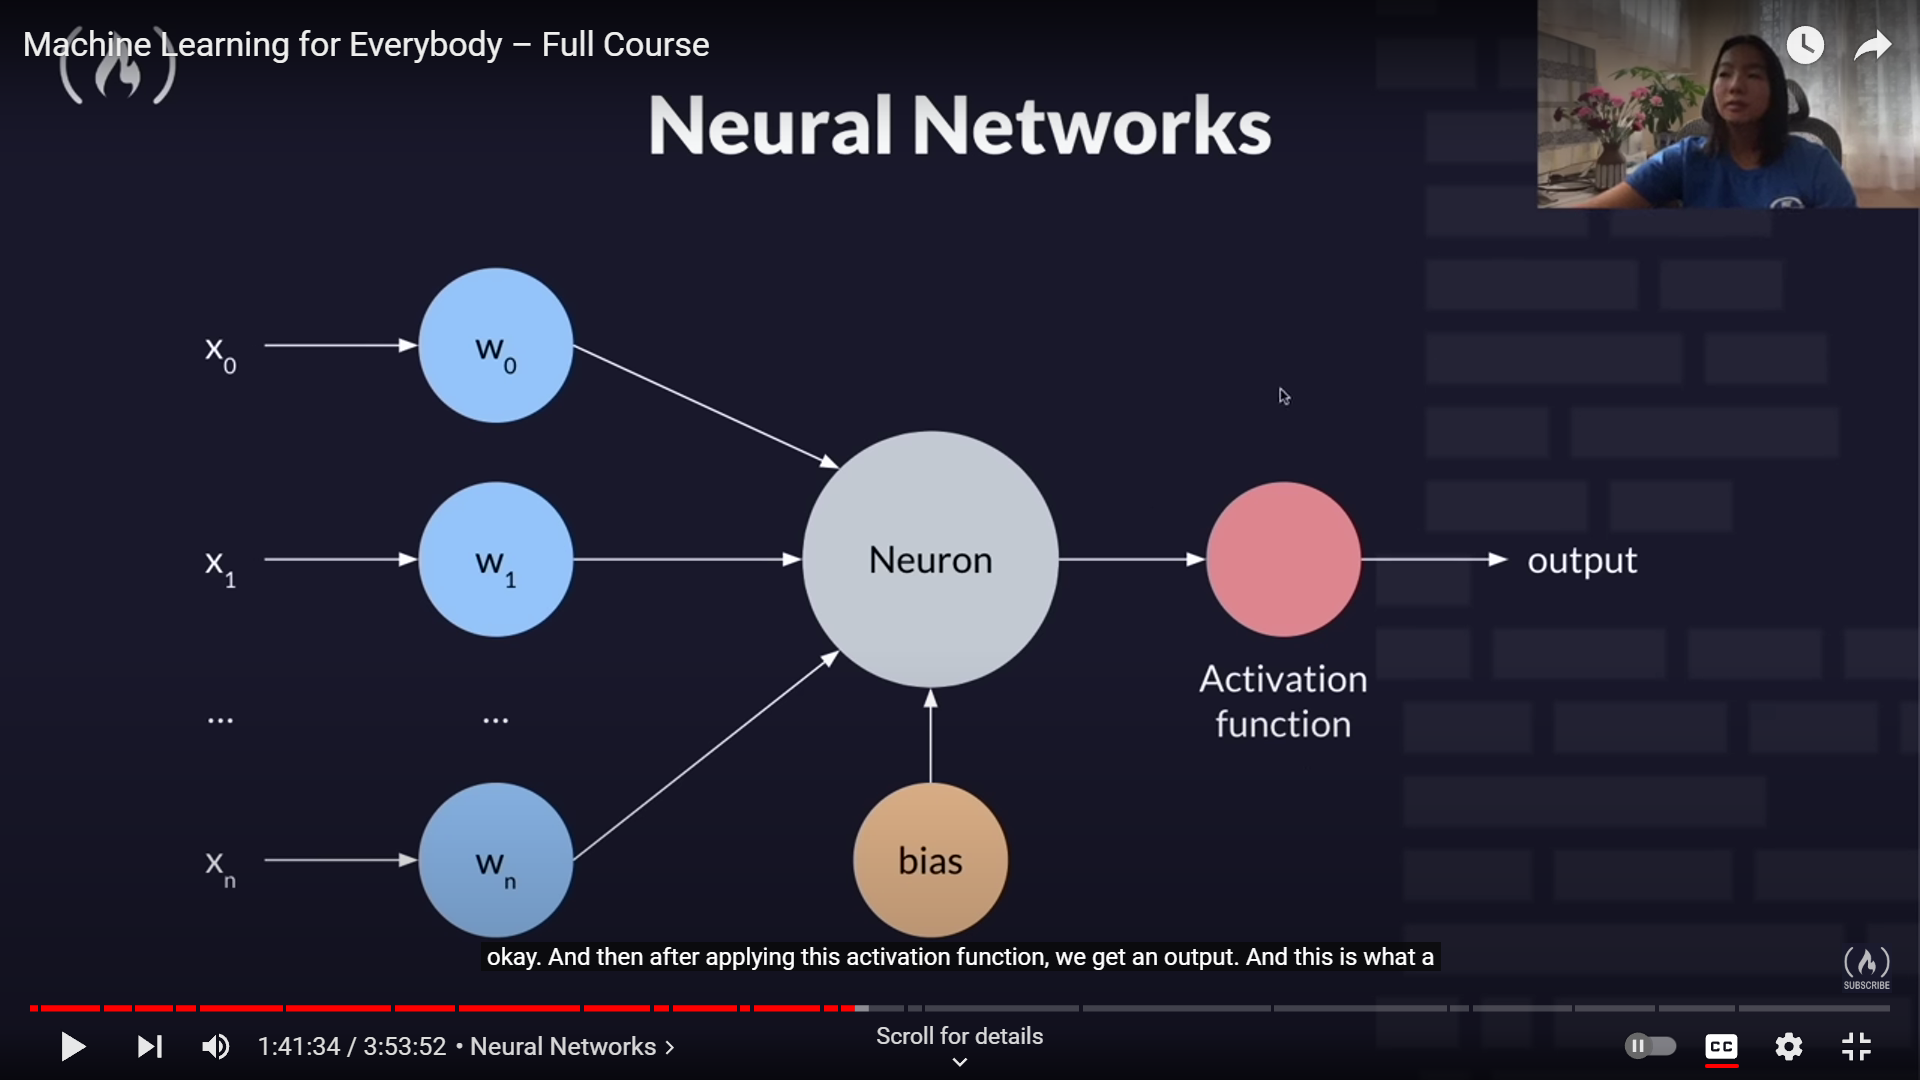

The basic idea behind neural networks is to simulate the behavior of the human brain. The network consists of layers of artificial neurons, each of which receives input from the previous layer, processes the input using an activation function, and passes the output to the next layer. The input to the first layer is the raw data, and the output of the last layer is the final prediction.

During the training phase, the weights of the connections between neurons are adjusted to minimize the difference between the predicted output and the actual output. This is typically done using an optimization algorithm such as backpropagation, which computes the gradient of the error with respect to the weights and updates them accordingly.

There are several types of neural networks, such as feedforward neural networks, recurrent neural networks, and convolutional neural networks, each of which is designed for a specific type of problem. For example, feedforward neural networks are used for tasks such as classification and regression, while recurrent neural networks are used for tasks such as language modeling and speech recognition.

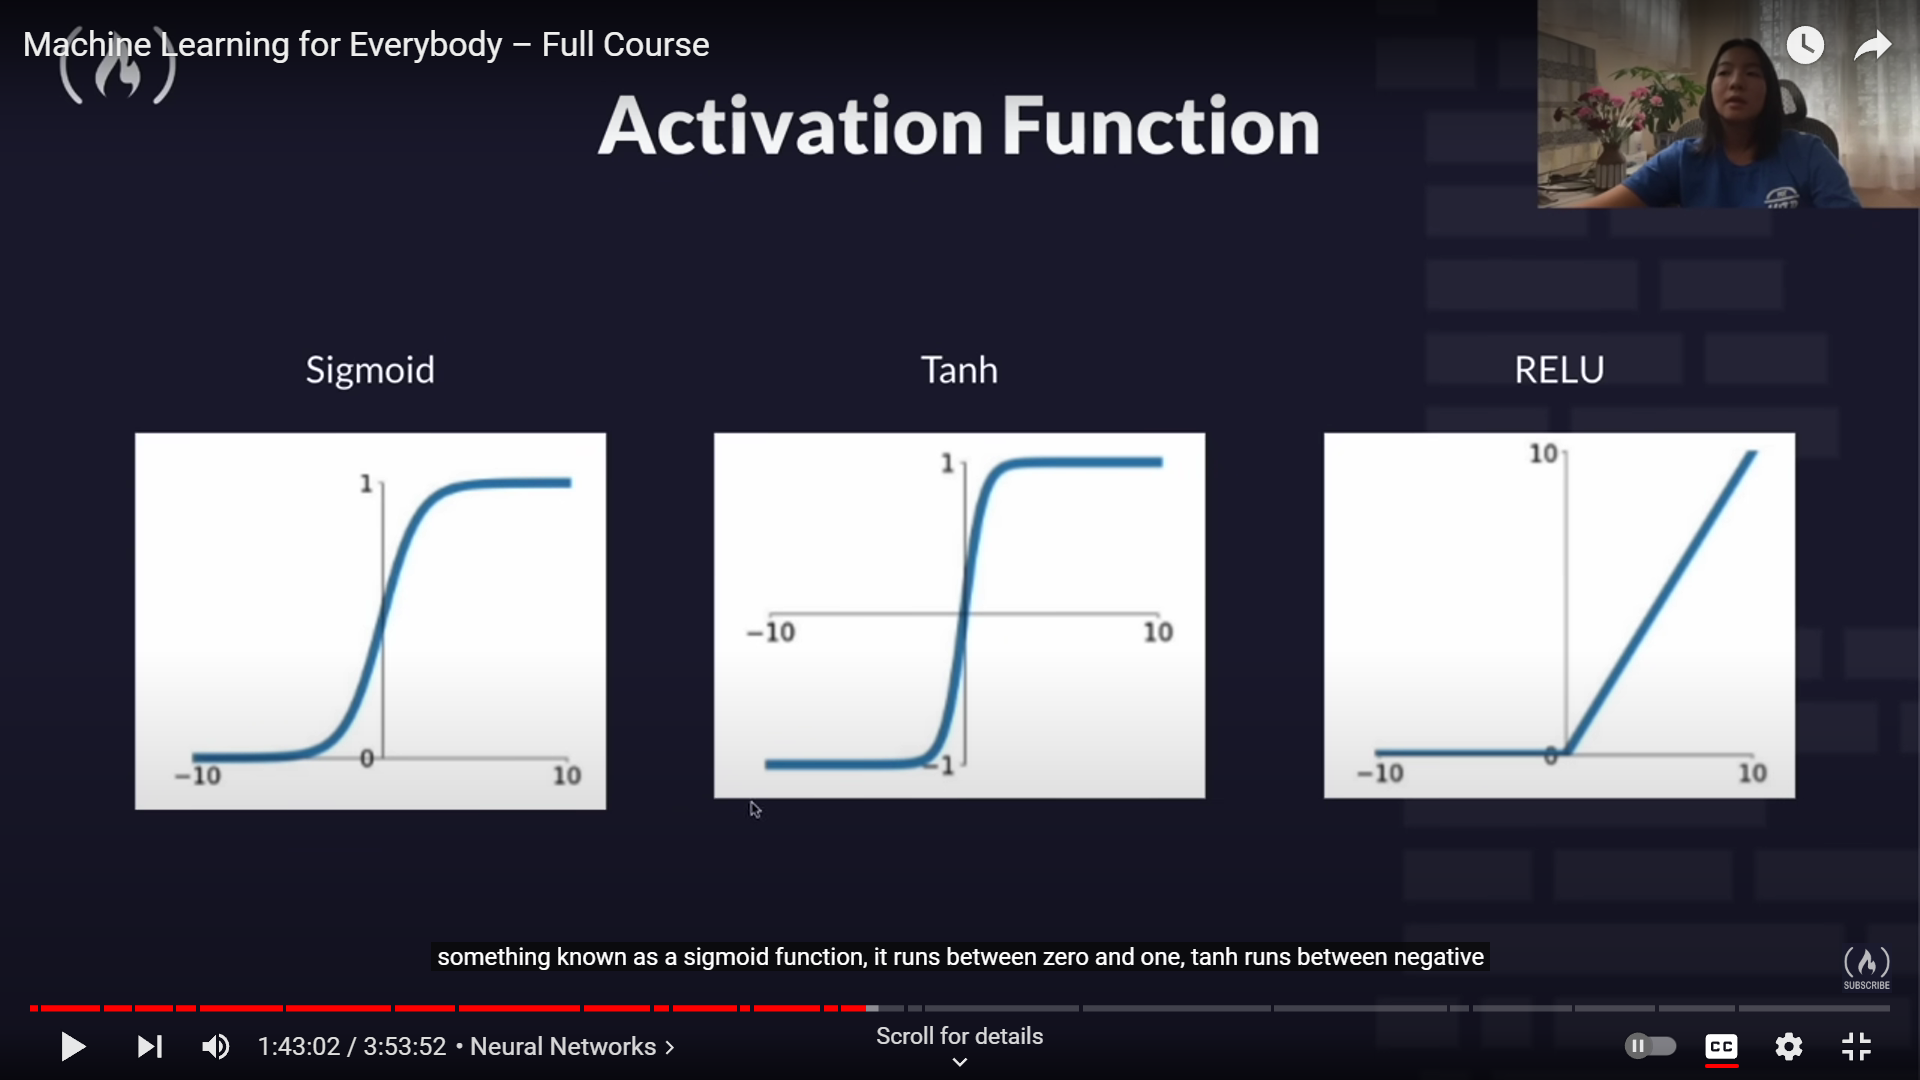

In [104]:
import tensorflow as tf

In [122]:
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.legend()
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.legend()
  ax2.grid(True)

  plt.show()

In [142]:
%%time

def train_model(X_train, y_train, num_nodnum_nodes, dropout_prob, lr, batch_size, epochs):
    nn_model = tf.keras.Sequential([
        tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(10,)),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(num_nodes, activation='relu'),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='binary_crossentropy', metrics=['accuracy']) 
#     history = nn_model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=.2)
    history = nn_model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0)
    
    return nn_model, history

CPU times: total: 0 ns
Wall time: 0 ns


32 nodes, dropout 0, lr 0.001, batch size 128


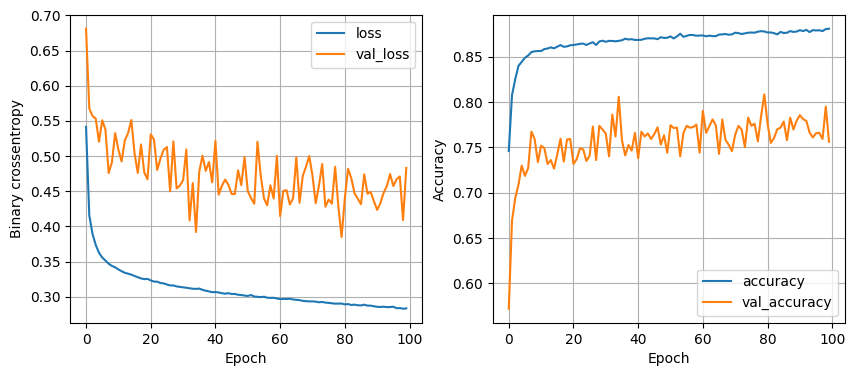

119/119 [==============================] - 0s 678us/step - loss: 0.2997 - accuracy: 0.8736
CPU times: total: 3.52 s
Wall time: 11.6 s


In [145]:
%%time

least_val_loss = float('inf')
least_loss_model = None
epochs=100

# for num_nodes in [16, 32, 64]:
#   for dropout_prob in[0, 0.2]:
#     for lr in [0.01, 0.005, 0.001]:
#       for batch_size in [32, 64, 128]:

for num_nodes in [32]:
  for dropout_prob in[0]:
    for lr in [0.001]:
      for batch_size in [128]:
        print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch size {batch_size}")
        model, history = train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
        plot_history(history)
        val_loss = model.evaluate(X_valid, y_valid)[0]
        if val_loss < least_val_loss:
            least_val_loss = val_loss
            least_loss_model = model

In [146]:
y_pred = least_loss_model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int).reshape(-1,)

119/119 [==============================] - 0s 602us/step


In [147]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.77      0.82      1370
           1       0.88      0.94      0.91      2434

    accuracy                           0.88      3804
   macro avg       0.88      0.85      0.86      3804
weighted avg       0.88      0.88      0.87      3804

